In [6]:
pip install resampy


     ---------------------------------------- 3.1/3.1 MB 3.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import os
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Flatten
from tensorflow.keras.utils import to_categorical
import resampy

In [2]:
def extract_features(file_path):
    audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    return np.mean(mfccs.T, axis=0)
print(resampy.__version__)

0.4.3


In [3]:
dataset = []
labels = []

for label in ['real', 'fake']:
    path = f'dataset/{label}'
    for file in os.listdir(path):
        file_path = os.path.join(path, file)
        features = extract_features(file_path)
        dataset.append(features)
        labels.append(label)

# Convert to DataFrame
df = pd.DataFrame(dataset)
df['label'] = labels


In [4]:
encoder = LabelEncoder()
y = encoder.fit_transform(df['label'])
X = df.drop(columns=['label']).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert labels to categorical format
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [5]:
model = Sequential()

# Input layer
model.add(Dense(256, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.3))

# Hidden layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │          10,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 43,650 (170.51 KB)

 Trainable params: 43,650 (170.51 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3333 - loss: 25.8495 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.3333 - loss: 39.1226 - val_accuracy: 1.0000 - val_loss: 0.0059
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.3333 - loss: 15.1158 - val_accuracy: 0.0000e+00 - val_loss: 28.4911
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.3333 - loss: 13.9122 - val_accuracy: 0.0000e+00 - val_loss: 53.1893
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.6667 - loss: 15.2620 - val_accuracy: 0.0000e+00 - val_loss: 66.0100
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.6667 - loss: 6.3041 - val_accuracy: 0.0000e+00 - val_loss: 73.3635
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.6667 - loss: 23.9809 - val_accuracy: 0.0000e+00 - val_loss: 75.0086
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.3333 - loss: 21.8101 - val

In [7]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.0000e+00 - loss: 12.8325
Test Accuracy: 0.00%


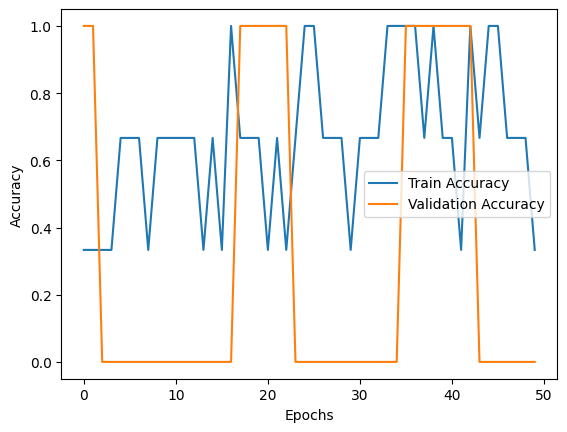

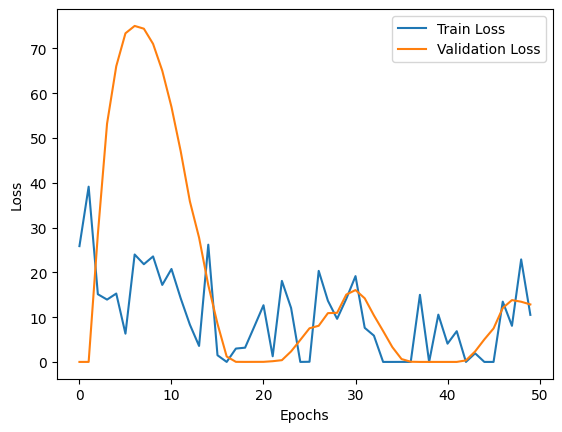

In [8]:
# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
#model.save('deep_voice_detection_model.h5')


In [ ]:
from tensorflow.keras.models import load_model

model = load_model('deep_voice_detection_model.h5')

# Test with a new audio file
file_path = 'path/to/test_audio.wav'
features = extract_features(file_path)
features = np.expand_dims(features, axis=0)

prediction = model.predict(features)
result = encoder.inverse_transform([np.argmax(prediction)])
print("Predicted Label:", result[0])


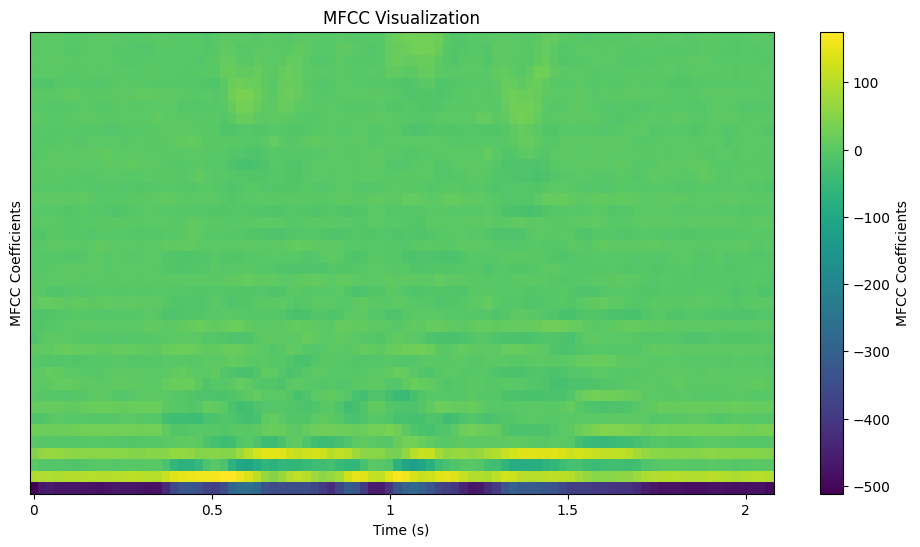

In [10]:
import librosa.display

# Load an example audio file
file_path = 'dataset/real/10018.wav'
audio, sr = librosa.load(file_path)

# Extract MFCC
mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)

# Plot MFCC
plt.figure(figsize=(12, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap='viridis')
plt.colorbar(label='MFCC Coefficients')
plt.title('MFCC Visualization')
plt.xlabel('Time (s)')
plt.ylabel('MFCC Coefficients')
plt.show()
